# **Import Libraries and modules**

In [0]:
#Installs and imports deep learning library keras
# https://keras.io/
!pip install -q keras
import keras

In [0]:
#import required python packages required for processing
import numpy as np

#import sequential model type of keras where layers are added one by one
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#split the mnist dataset to training and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


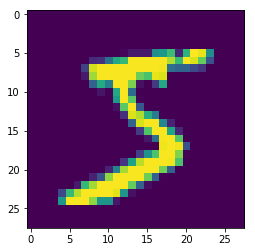

In [0]:
#Print the dimension of training dataset of mnist and  first training image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Reshaped Train and Test datasets from (60000,28,28) to (60000, 28,28,1) by taking into input channels 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Ascertaining Value type of float and Normalising the values of pixels to be between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
#Print the actual outputs of first 10 training datasets
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#Print the actual outputs of first 10 training datasets as categorical values 
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#Generate a model for training the mnsit dataset
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
model = Sequential()

model.add(Convolution2D(8, 3, 3,input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16,3,3))
model.add(BatchNormalization())
model.add(Activation('relu'))
          
model.add(Dropout(0.2))          
          
model.add(Convolution2D(24,3,3))
model.add(BatchNormalization())
model.add(Activation('relu'))         
         
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Convolution2D(10,1,1))
          
          
model.add(Convolution2D(8,3,3))
model.add(BatchNormalization())
model.add(Activation('relu'))     
          
model.add(Convolution2D(16,3,3))
model.add(BatchNormalization())
model.add(Activation('relu'))
          
model.add(Dropout(0.2))
          
          
model.add(Convolution2D(24,3,3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(24,3,3))
model.add(BatchNormalization())
model.add(Activation('relu'))
          
model.add(Convolution2D(10,3,3))
model.add(BatchNormalization())
model.add(Activation('relu'))          

model.add(Flatten())
model.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python

In [0]:
#Print Model Summary giving the number of parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_32 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
activation_35 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_33 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_36 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 16)        0         
__________

In [0]:
# Compile the above model with loss type of categorical_crossentropy as the output is categorical type
# optimizer 'adam' is based on stochastic gradient which is efficient 
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [0]:
#Train the model with batch_size of 32 and for 10 epochs
model.fit(X_train, Y_train, batch_size=32, nb_epoch=40, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/40
60000/60000 [==============================] - 42s 694us/step - loss: 0.4609 - acc: 0.9120
Epoch 2/40
60000/60000 [==============================] - 39s 658us/step - loss: 0.1724 - acc: 0.9646
Epoch 3/40
60000/60000 [==============================] - 40s 661us/step - loss: 0.1174 - acc: 0.9734
Epoch 4/40
60000/60000 [==============================] - 40s 659us/step - loss: 0.0931 - acc: 0.9782
Epoch 5/40
60000/60000 [==============================] - 39s 656us/step - loss: 0.0768 - acc: 0.9813
Epoch 6/40
60000/60000 [==============================] - 39s 656us/step - loss: 0.0685 - acc: 0.9829
Epoch 7/40
60000/60000 [==============================] - 39s 655us/step - loss: 0.0605 - acc: 0.9842
Epoch 8/40
60000/60000 [==============================] - 39s 655us/step - loss: 0.0544 - acc: 0.9856
Epoch 9/40
60000/60000 [==============================] - 39s 655us/step - loss: 0.0520 - acc: 0.9863
Epoch 10/40
60000/60000 [==============================] - 39s 656us/step - loss: 

In [0]:
#Evaluate the trained model with Test Data set
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.02120129779402632, 0.9941]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.9941426e-05 1.4619132e-04 3.0470994e-05 4.5430799e-05 9.7288437e-05
  1.9941426e-05 1.9941426e-05 9.9955827e-01 1.9941426e-05 4.2570235e-05]
 [6.5080172e-07 1.1018042e-05 9.9998391e-01 6.3290452e-07 6.3290452e-07
  6.3290452e-07 6.3290452e-07 6.3290452e-07 6.3290452e-07 6.3290452e-07]
 [6.6803176e-07 9.9999154e-01 7.9154759e-08 1.8936656e-06 2.7572082e-07
  6.6207110e-07 2.7510375e-06 1.2624173e-06 1.9981428e-07 4.6649876e-07]
 [9.9979132e-01 1.0030707e-04 1.0009836e-06 1.0009836e-06 2.6389614e-06
  1.0009836e-06 4.8886188e-05 3.7105392e-06 2.3437387e-06 4.7753692e-05]
 [7.5379459e-05 2.3551917e-04 2.1847194e-05 3.3613385e-05 9.9946183e-01
  4.4156201e-05 2.1847194e-05 2.1847194e-05 2.1847194e-05 6.2035622e-05]
 [2.6615646e-07 9.9999392e-01 3.0562504e-08 7.7841872e-07 1.9984145e-07
  1.1687359e-07 2.4092301e-06 1.7898824e-06 5.4146447e-08 4.1978964e-07]
 [6.0538587e-06 1.1924114e-05 6.0538587e-06 6.0538587e-06 9.9992621e-01
  6.0538587e-06 7.4200379e-06 6.0538587e-06 1.3418601e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored